In [1]:
# PCA 主成分分析  “无监督式的”  不考虑分类情况
from sklearn.decomposition import PCA

# LDA 线性判别分析 “有监督式的” 考虑分类情况
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()
data = iris.data
target = iris.target

In [5]:
data.shape

(150, 4)

In [7]:
train = data[:,:2]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier()

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score

In [10]:
cross_val_score(knnclf,train,target)

array([0.74509804, 0.74509804, 0.77083333])

In [11]:
cross_val_score(knnclf,data,target)

array([0.98039216, 0.98039216, 1.        ])

In [12]:
# 使用降维技术来理解数据
# 可以是一个整数 表示要保留的特征维度
# 可以是一个0-1之间的float，表示方差累计贡献的阈值
# 1. 创建一个pca降维对象
pca = PCA(n_components=2)
# 2. 使用pca对象，对4维特征进行将维到2个特征
train_pca = pca.fit_transform(data)

In [13]:
train_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

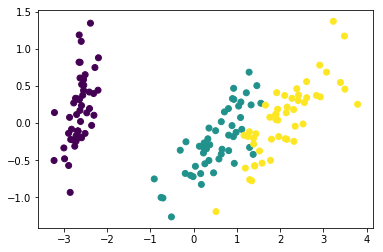

In [14]:
# 绘制pca降维后的特征图像
plt.scatter(train_pca[:,0],train_pca[:,1],c=target)

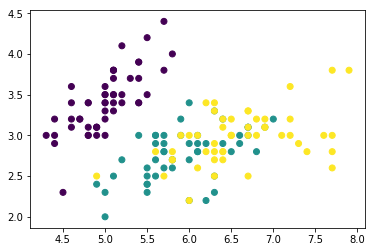

In [15]:
# 观察图像，pca降维后的数据更容易分析
plt.scatter(train[:,0],train[:,1],c=target)

In [16]:
# 使用LDA进行降维处理
lda = LinearDiscriminantAnalysis(n_components=2)
# LDA考虑分类情况，所以多一个类标签做参数
train_lda = lda.fit_transform(data,target)

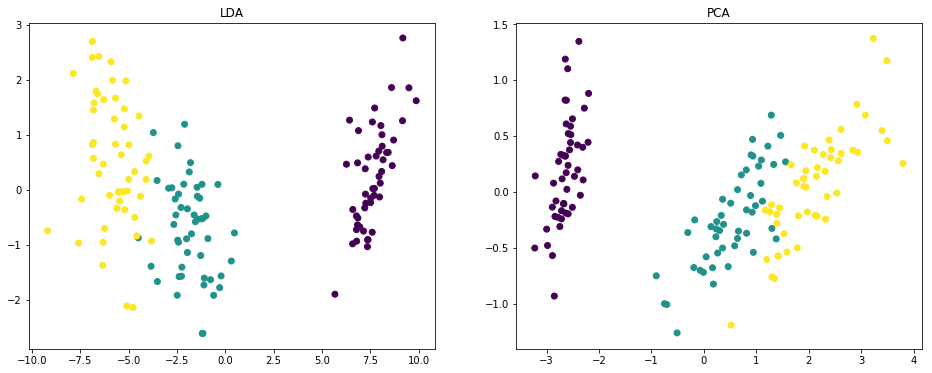

In [19]:
plt.figure(figsize=(16,6))
axes1 = plt.subplot(1,2,1)
axes1.set_title('LDA')
axes1.scatter(train_lda[:,0],train_lda[:,1],c=target)

axes2 = plt.subplot(1,2,2)
axes2.set_title('PCA')
axes2.scatter(train_pca[:,0],train_pca[:,1],c=target)

In [23]:
cross_val_score(knnclf,train_pca,target)

array([0.98039216, 0.94117647, 0.97916667])

In [24]:
cross_val_score(knnclf,train_lda,target)

array([1.        , 0.94117647, 1.        ])

In [30]:
# 0.95理解为保留完整信息的95%
pca1 = PCA(n_components=0.95)
pca1.fit_transform(data)

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,